In [29]:
%matplotlib inline
import numpy as np
import pandas as pd
import librosa
import librosa.display
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from IPython.display import Audio


# LOAD WAVE by librosa

In [46]:
y, sr = librosa.load('/home/alvin/cei/notebook_home/ai_lab_sound/beat_tracting/corpus/mirex_beat_tracking_2016/train/train11.wav')
print('sample rate = ' + str(sr))
print('sample number = ' + str(len(y)))
print('duration = ' + str(len(y)) + '/' + str(sr) + ' = ' + str(int(len(y)/sr)) + 's')

sample rate = 22050
sample number = 661500
duration = 661500/22050 = 30s


# PLOT WAVE

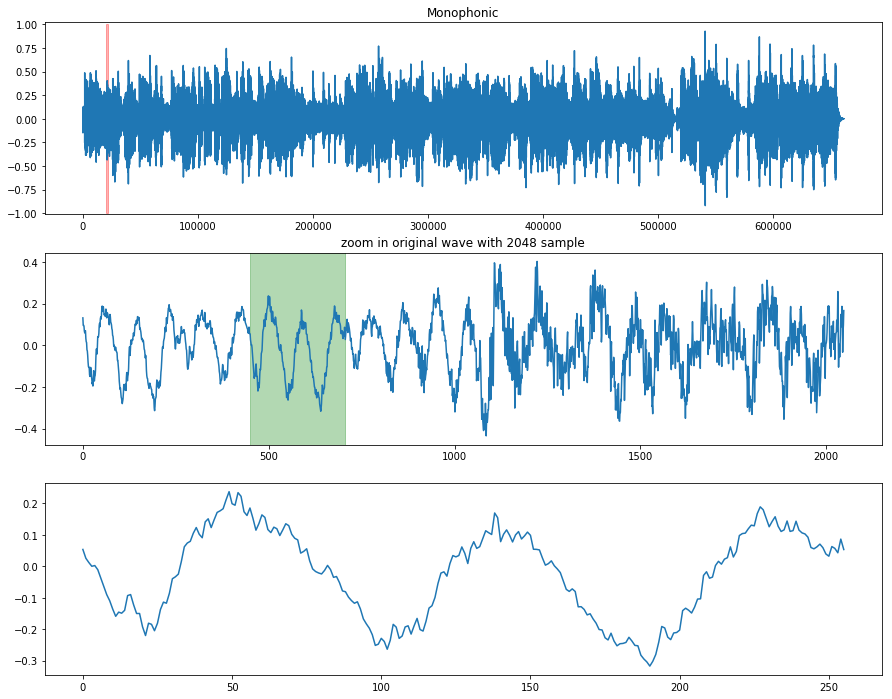

In [67]:
fig,ax = plt.subplots(3,1,figsize=(15,12))
# row 1
ax[0].plot(y)
ax[0].title.set_text('Monophonic')
# row 2
beg_1  = 20000
frame_size_1 = 2048
yzoom = y[beg_1:beg_1+frame_size_1]
rec_red = patches.Rectangle((beg_1,-1),frame_size_1,2,linewidth=1,color='red',alpha=0.3)
ax[0].add_patch(rec_red)
ax[1].plot(yzoom)
ax[1].title.set_text('zoom in original wave with ' + str(frame_size_1) + ' sample')
# row 3
beg_2 = 450
frame_size_2 = 256
yzz = yzoom[beg_2:beg_2+frame_size_2]
rec_green = patches.Rectangle((beg_2,-1),frame_size_2,2,linewidth=1,color='green',alpha=0.3)
ax[1].add_patch(rec_green)
ax[2].plot(yzz)


# PLAY WAVE

In [40]:
# play all wave file with 30s
Audio(data=y,rate=sr)

In [56]:
# paly red rectangle part wave, 
# rectangle length is frame_size = 2048, 2048/22050 = 
print(str(round(2048/22050,3))+'s')
Audio(yzoom,rate=sr)

0.093s


# plot frequency domain

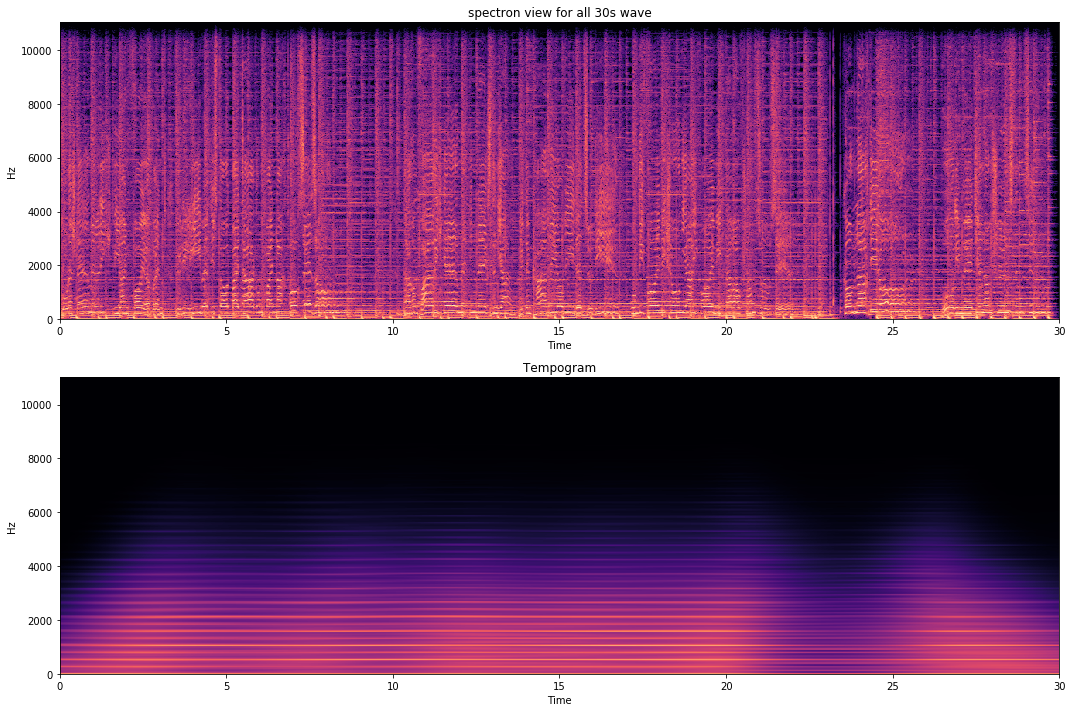

In [107]:
fig,ax = plt.subplots(2,1,figsize=(15,10))
D = librosa.amplitude_to_db(librosa.stft(y), ref=np.max)
ax[0] = plt.subplot(2, 1, 1)
ax[0].title.set_text('spectron view for all 30s wave')
librosa.display.specshow(D, y_axis='linear', x_axis='time')
# row 2
beg_1  = 20000
frame_size_1 = 4096
yzoom = y[beg_1:beg_1+frame_size_1]
#D2 = librosa.amplitude_to_db(librosa.cqt(yzoom, sr=sr), ref=np.max)
#D2 = librosa.amplitude_to_db(librosa.stft(yzoom), ref=np.max)
#ax[1] = plt.subplot(2, 1, 2)
#ax[1].title.set_text('spectron view for all 0.9s wave')
#librosa.display.specshow(D2, y_axis='linear', x_axis='time')
ax[1] = plt.subplot(2, 1, 2)
Tgram = librosa.feature.tempogram(y=y, sr=sr)
librosa.display.specshow(Tgram, x_axis='time', y_axis='linear')
#plt.colorbar()
plt.title('Tempogram')
plt.tight_layout()

In [ ]:
#y, sr = librosa.load(librosa.util.example_audio_file())

In [100]:
#y, sr = librosa.load(librosa.util.example_audio_file())
tempo, beats = librosa.beat.beat_track(y=y, sr=sr)
tempo

143.5546875

In [106]:
onset_env = librosa.onset.onset_strength(y, sr=sr,aggregate=np.median)
len(onset_env)

1292

In [102]:
times = librosa.frames_to_time(np.arange(len(onset_env)),sr=sr, hop_length=hop_length)

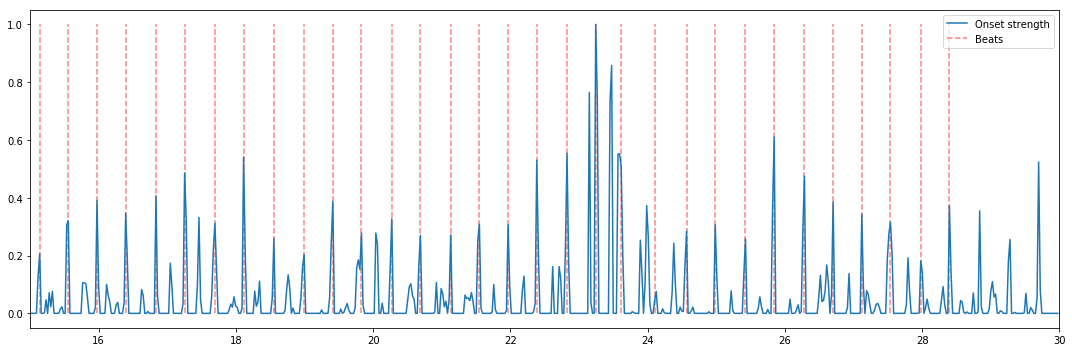

In [104]:
fig, ax = plt.subplots(1,1,figsize=(15,5))
plt.plot(times, librosa.util.normalize(onset_env),label='Onset strength')
plt.vlines(times[beats], 0, 1, alpha=0.5, color='r',linestyle='--', label='Beats')
plt.legend(frameon=True, framealpha=0.75)
# Limit the plot to a 15-second window
plt.xlim(15, 30)
plt.gca().xaxis.set_major_formatter(librosa.display.TimeFormatter())
plt.tight_layout()